# SDA - lecture 3 - Poisson processes

In [48]:
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(asctime)s: %(message)s')

import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Generate a "spike train" of a neuron 
samp = 1000
rate = 20 / samp
duration = 100

spk_array = (np.random.uniform(size=samp*duration)<rate).astype(np.int32)
time_array = np.arange(0, duration, 1/samp)

### Histogram of spike counts in different sized bins

INFO: 2020-03-11 17:47:06,760: (Bin size=25) Mean 0.48 Var 0.47 --> Fano Factor : 0.97
INFO: 2020-03-11 17:47:06,790: (Bin size=50) Mean 0.97 Var 0.91 --> Fano Factor : 0.94
INFO: 2020-03-11 17:47:06,814: (Bin size=100) Mean 1.93 Var 1.80 --> Fano Factor : 0.93
INFO: 2020-03-11 17:47:06,832: (Bin size=200) Mean 3.87 Var 3.81 --> Fano Factor : 0.98
INFO: 2020-03-11 17:47:06,857: (Bin size=400) Mean 7.74 Var 7.63 --> Fano Factor : 0.99


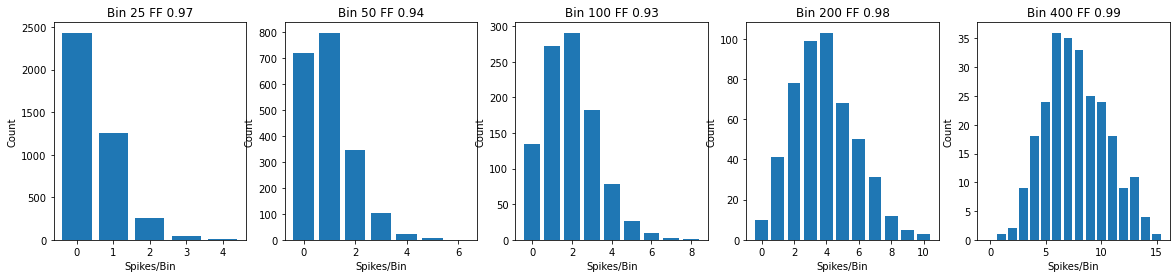

In [53]:
bin_range = [25, 50, 100,200,400]
fig, ax = plt.subplots(figsize=(4*len(bin_range),4), nrows=1, ncols=len(bin_range))

for a, bin_size in enumerate(bin_range):
    bin_array = np.zeros(math.ceil(samp*duration/bin_size))
    for i, s in enumerate(np.arange(0, samp*duration, bin_size)):
        bin_array[i] = spk_array[s:s+bin_size].sum()
    hist_vals, hist_bins = np.histogram(bin_array, bins = np.arange(0, bin_array.max()+2))
    bin_mean, bin_var = np.mean(bin_array), np.var(bin_array)
    ff = bin_var / bin_mean
    ax[a].bar(hist_bins[0:-1],hist_vals)
    ax[a].set_xlabel('Spikes/Bin')
    ax[a].set_ylabel('Count')
    ax[a].set_title(f'Bin {bin_size} FF {ff:.2f}')
    logging.info(f'(Bin size={bin_size}) Mean {bin_mean:.2f} Var {bin_var:.2f} --> Fano Factor : {ff:.2f}')